In [44]:
import json
import numpy as np
import cv2
import matplotlib.pyplot as plt

import sys
sys.path.append("..")

from evaluate.lane import LaneEval
%matplotlib inline

Suppose we have two json files, one is the ground truth and the other is the prediction.

We assume that each line in prediction json file is corresponding to the ground truth json, 
which means both lines are related to the same image.

假定我们有俩个json文件，一个是GT，一个是预测文件.
我们假设预测 json 文件中的每一行都对应于 GT json, 这意味着两条线都与同一图像相关。

In [45]:
pred_json_path = "label_data_0313.json"
GT_json_path = "label_data_0313.json"
json_pred = [json.loads(line) for line in open(pred_json_path).readlines()]
json_gt = [json.loads(line) for line in open(GT_json_path).readlines()]

In [46]:
id_ = 1
pred, gt = json_pred[id_], json_gt[id_]
pred_lanes = pred['lanes']
# run_time = pred['run_time']
run_time = 0.5 # 可能是运行时间的意思
gt_lanes = gt['lanes']
y_samples = gt['h_samples']
raw_file = gt['raw_file']

First let's check out the image.

第一步线绘制一下原图

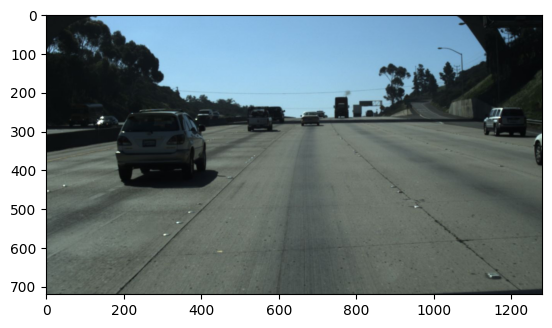

In [47]:
img = plt.imread(raw_file)
plt.imshow(img)
plt.show()

Then, we show how to use `y_samples`.

接下来，让我们来绘制一下标注点. (如何使用`y_samples`)

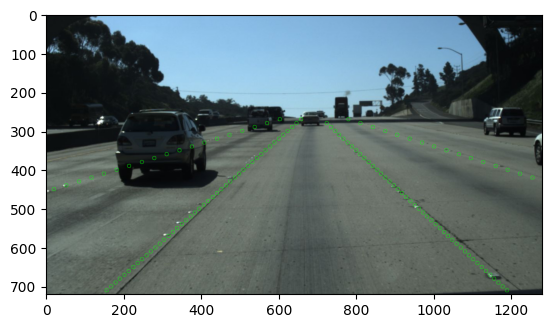

In [48]:
gt_lanes_vis = [[(x, y) for (x, y) in zip(lane, y_samples) if x >= 0] for lane in gt_lanes]
img_vis = img.copy()

for lane in gt_lanes_vis:
    for pt in lane:
        cv2.circle(img_vis, pt, radius=5, color=(0, 255, 0))

plt.imshow(img_vis)
plt.show()

Then, we show the ground truth and the prediction example.

The ground truth is shown in green and the prediction is shown in blue. As we can see the prediction is not perfect.

OK, 接下来同时展示GT和预测结果.

GT以绿色显示，预测以蓝色显示。 正如我们所见，预测并不完美。

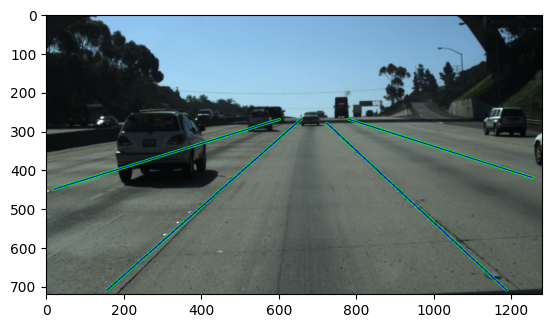

In [49]:
gt_lanes_vis = [[(x, y) for (x, y) in zip(lane, y_samples) if x >= 0] for lane in gt_lanes]
pred_lanes_vis = [[(x, y) for (x, y) in zip(lane, y_samples) if x >= 0] for lane in pred_lanes]
img_vis = img.copy()

for lane in gt_lanes_vis:
    cv2.polylines(img_vis, np.int32([lane]), isClosed=False, color=(0,255,0), thickness=5)
for lane in pred_lanes_vis:
    cv2.polylines(img_vis, np.int32([lane]), isClosed=False, color=(0,0,255), thickness=2)

plt.imshow(img_vis)
plt.show()

Now we can use the tool to evaluate the prediction based on the data.

The evaluation metric is described on the benchmark website.

现在我们可以使用该工具根据数据评估预测。

评估指标在 benchmark 网站上进行了描述。

In [50]:
np.random.shuffle(pred_lanes)
# Overall Accuracy, False Positive Rate, False Negative Rate
print(LaneEval.bench(pred_lanes, gt_lanes, y_samples, run_time))

(1.0, 0.0, 0.0)
